In [1]:
import pandas as pd
df=pd.read_csv('../Datasets/1airtel_comments_analysis_final.csv')

In [2]:
df.columns

Index(['commentAuthor', 'commentLikesCount', 'commentText', 'commentTimestamp',
       'postCommentsCount', 'postDescription', 'postLikesCount',
       'postTimestamp', 'postUrl', 'profileDescription', 'profileFollowers',
       'profileName', 'profileUrl', 'sentiment/finalClassification',
       'sentiment/finalScore', 'sentiment/negativeScore',
       'sentiment/neutralScore', 'sentiment/positiveScore', 'targetPlatform'],
      dtype='object')

  sentiment/finalClassification  sentiment/finalScore  \
0                      negative              0.914784   
1                      negative              0.939654   
2                      negative              0.730052   
3                      negative              0.896282   
4                      negative              0.812319   

   sentiment/negativeScore  sentiment/neutralScore  sentiment/positiveScore  
0                 0.914784                0.075327                 0.009889  
1                 0.939654                0.053068                 0.007278  
2                 0.730052                0.236193                 0.033756  
3                 0.896282                0.093976                 0.009743  
4                 0.812319                0.173854                 0.013827  


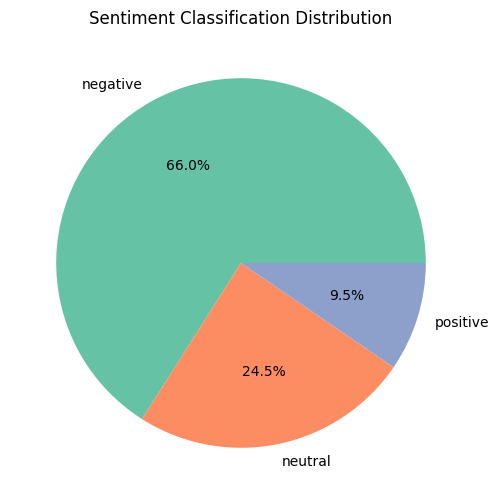

C:\Users\LCT\AppData\Local\Temp\ipykernel_15296\621009828.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')


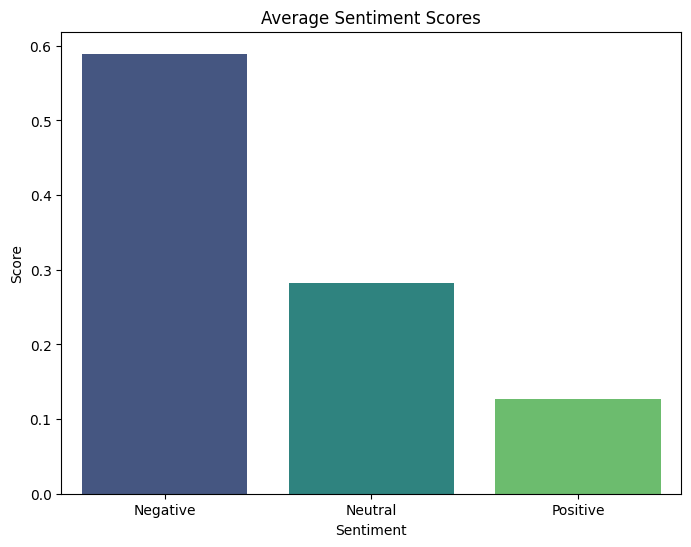

C:\Users\LCT\AppData\Local\Temp\ipykernel_15296\621009828.py:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


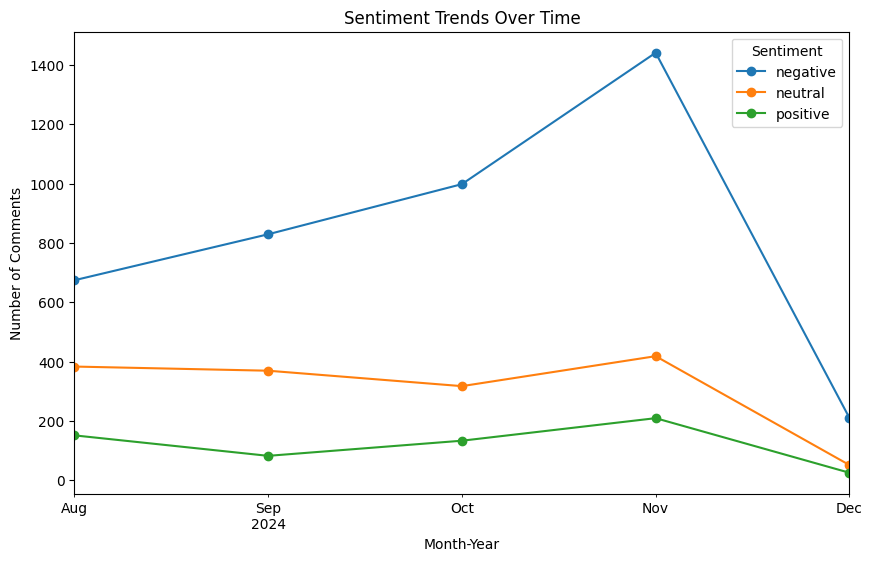


Sentiment Classification Percentages:
sentiment/finalClassification
negative    66.009539
neutral     24.451510
positive     9.538951
Name: count, dtype: float64

Average Sentiment Scores:
{'Negative': np.float64(0.5894543195900505), 'Neutral': np.float64(0.28225387021401727), 'Positive': np.float64(0.126860968434046)}


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's already loaded as 'df')
# df = pd.read_csv('your_file.csv')  # Uncomment if loading from a CSV file

# Check the structure of the sentiment-related columns
print(df[['sentiment/finalClassification', 'sentiment/finalScore', 
          'sentiment/negativeScore', 'sentiment/neutralScore', 'sentiment/positiveScore']].head())

# ----- Sentiment Distribution -----
# Count the occurrences of each sentiment classification
sentiment_distribution = df['sentiment/finalClassification'].value_counts()

# Plot the sentiment distribution as a pie chart
plt.figure(figsize=(8, 6))
sentiment_distribution.plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Classification Distribution')
plt.ylabel('')  # Remove the y-label for aesthetics
plt.show()

# ----- Average Sentiment Scores -----
# Calculate the average scores for each sentiment type
average_scores = {
    'Negative': df['sentiment/negativeScore'].mean(),
    'Neutral': df['sentiment/neutralScore'].mean(),
    'Positive': df['sentiment/positiveScore'].mean()
}

# Convert the dictionary to a DataFrame for visualization
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Sentiment', 'Average Score'])

# Plot the average sentiment scores as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.xlabel('Sentiment')
plt.show()

# ----- Sentiment Trends Over Time -----
# Convert the 'commentTimestamp' to datetime
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])

# Group by month and sentiment classification to track sentiment trends
df['month_year'] = df['commentTimestamp'].dt.to_period('M')
sentiment_trends = df.groupby(['month_year', 'sentiment/finalClassification']).size().unstack()

# Plot sentiment trends over time
sentiment_trends.plot(figsize=(10, 6), marker='o')
plt.title('Sentiment Trends Over Time')
plt.ylabel('Number of Comments')
plt.xlabel('Month-Year')
plt.legend(title='Sentiment')
plt.show()

# ----- Summary Statistics -----
# Calculate sentiment classification percentages
sentiment_percentages = (sentiment_distribution / sentiment_distribution.sum()) * 100
print("\nSentiment Classification Percentages:")
print(sentiment_percentages)

# Display average scores
print("\nAverage Sentiment Scores:")
print(average_scores)


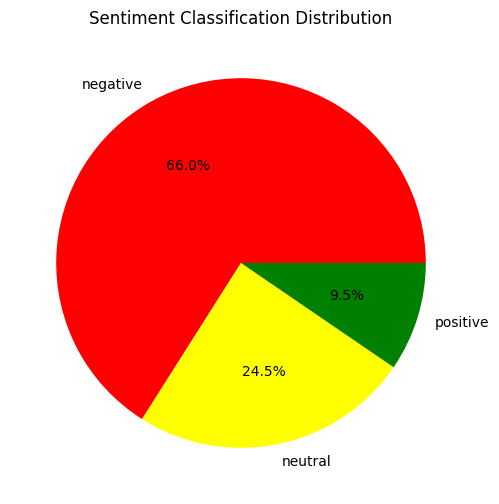

C:\Users\LCT\AppData\Local\Temp\ipykernel_15296\3882850816.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')


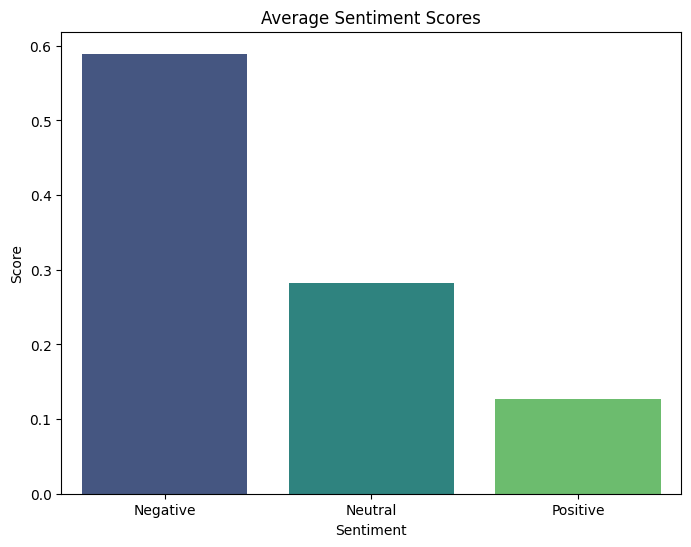

C:\Users\LCT\AppData\Local\Temp\ipykernel_15296\3882850816.py:40: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

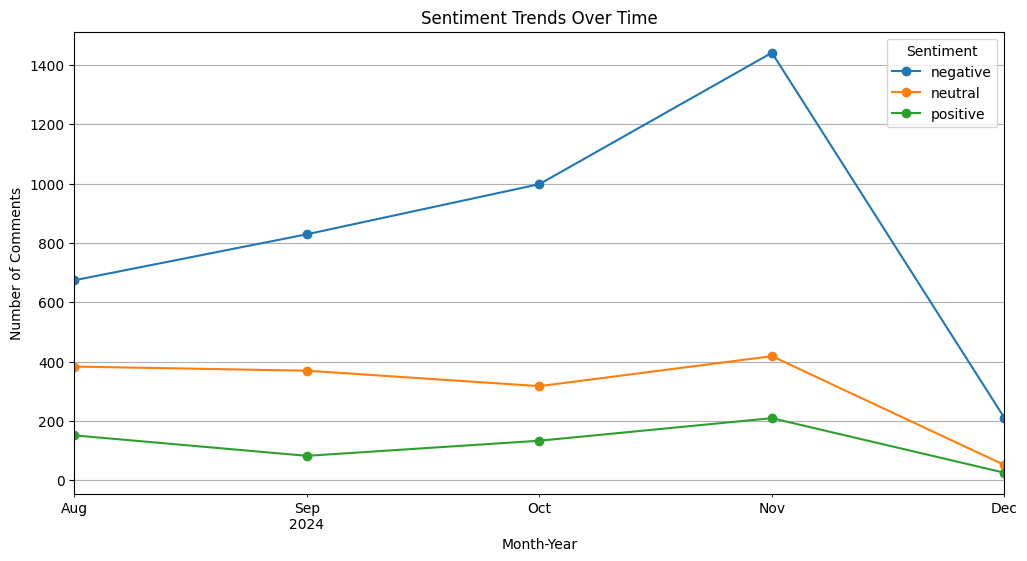

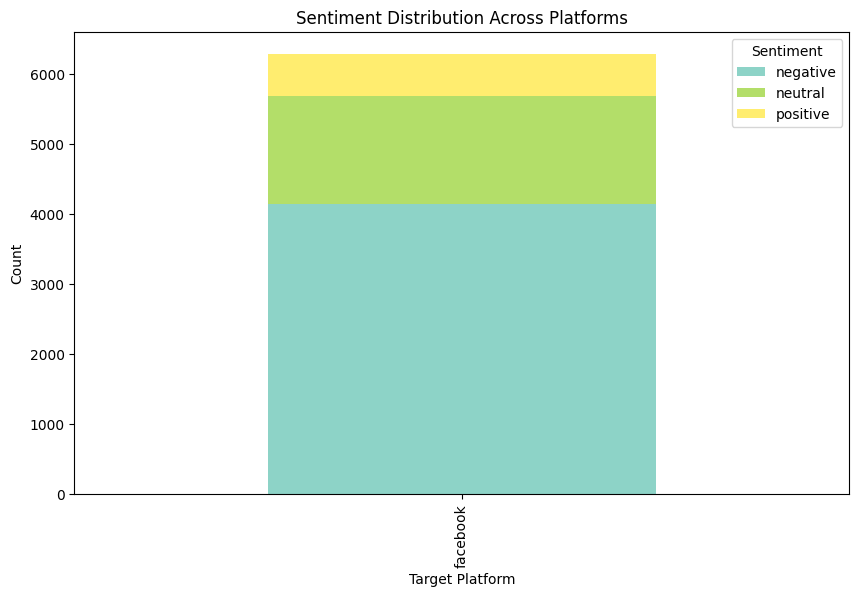

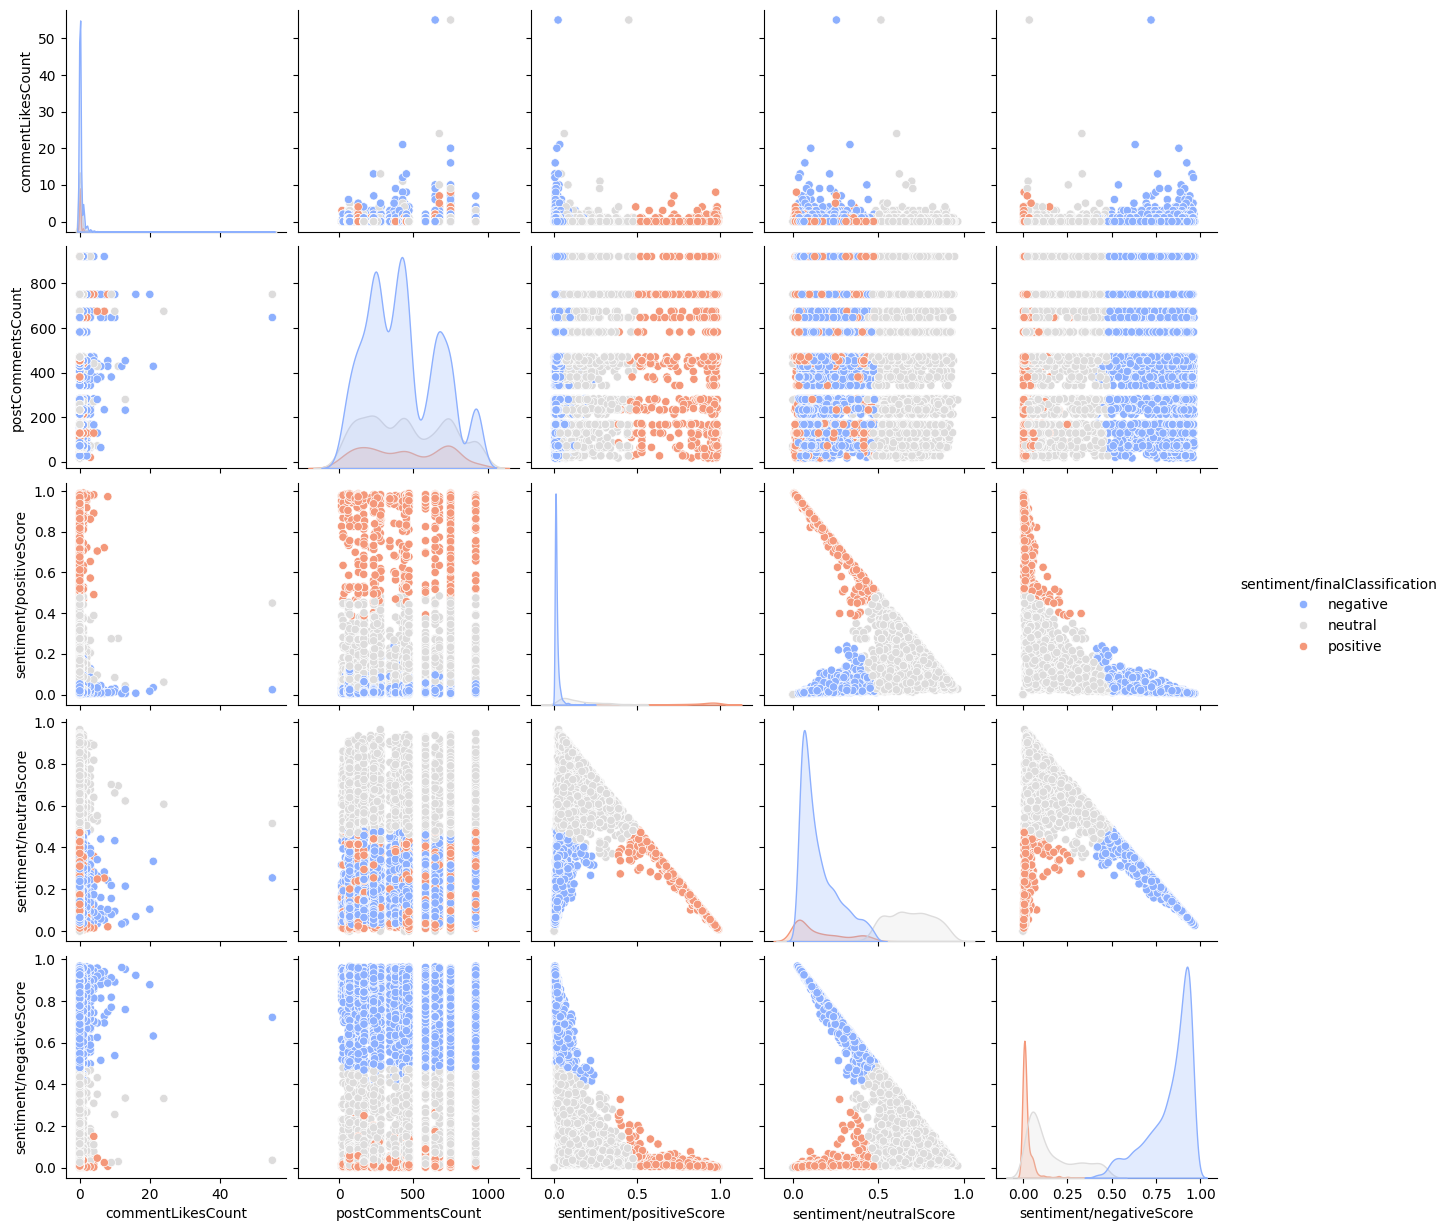

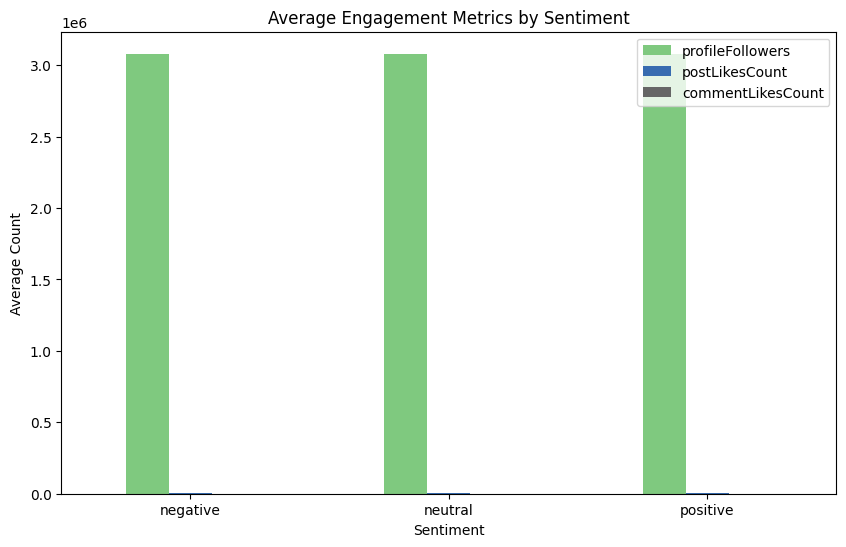

Sentiment Classification Counts:
 sentiment/finalClassification
negative    4152
neutral     1538
positive     600
Name: count, dtype: int64

Average Sentiment Scores:
 {'Negative': np.float64(0.5894543195900505), 'Neutral': np.float64(0.28225387021401727), 'Positive': np.float64(0.126860968434046)}

Engagement Metrics by Sentiment:
                                profileFollowers  postLikesCount  \
sentiment/finalClassification                                     
negative                              3079672.0      3209.09104   
neutral                               3079672.0      4908.53251   
positive                              3079672.0      8145.38000   

                               commentLikesCount  
sentiment/finalClassification                     
negative                                0.267341  
neutral                                 0.198309  
positive                                0.196667  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as `df`
# df = pd.read_csv('your_data.csv')  # Uncomment to load from a file

# Convert timestamps to datetime for analysis
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])
df['postTimestamp'] = pd.to_datetime(df['postTimestamp'])

# ----- Sentiment Classification Distribution -----
sentiment_counts = df['sentiment/finalClassification'].value_counts()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.title('Sentiment Classification Distribution')
plt.ylabel('')
plt.show()

# ----- Average Sentiment Scores -----
average_scores = {
    'Negative': df['sentiment/negativeScore'].mean(),
    'Neutral': df['sentiment/neutralScore'].mean(),
    'Positive': df['sentiment/positiveScore'].mean()
}
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Sentiment', 'Average Score'])

# Bar Chart for Average Sentiment Scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.xlabel('Sentiment')
plt.show()

# ----- Time-Based Sentiment Trends -----
# Extract month-year for grouping
df['month_year'] = df['commentTimestamp'].dt.to_period('M')
sentiment_trends = df.groupby(['month_year', 'sentiment/finalClassification']).size().unstack()

# Line Chart for Sentiment Trends Over Time
plt.figure(figsize=(10, 6))
sentiment_trends.plot(marker='o', figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.ylabel('Number of Comments')
plt.xlabel('Month-Year')
plt.legend(title='Sentiment')
plt.grid()
plt.show()

# ----- Platform-Based Sentiment Distribution -----
platform_sentiment = df.groupby(['targetPlatform', 'sentiment/finalClassification']).size().unstack()

# Stacked Bar Chart for Sentiment by Platform
platform_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Sentiment Distribution Across Platforms')
plt.ylabel('Count')
plt.xlabel('Target Platform')
plt.legend(title='Sentiment')
plt.show()

# ----- Correlation Analysis -----
# Pairplot to visualize relationships between scores and engagement
sns.pairplot(df, vars=['commentLikesCount', 'postCommentsCount', 
                       'sentiment/positiveScore', 'sentiment/neutralScore', 'sentiment/negativeScore'],
             hue='sentiment/finalClassification', palette='coolwarm')
plt.show()

# ----- Profile Engagement by Sentiment -----
engagement_by_sentiment = df.groupby('sentiment/finalClassification')[['profileFollowers', 'postLikesCount', 'commentLikesCount']].mean()

# Bar Chart for Profile Engagement by Sentiment
engagement_by_sentiment.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Average Engagement Metrics by Sentiment')
plt.ylabel('Average Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

# ----- Summary Statistics -----
print("Sentiment Classification Counts:\n", sentiment_counts)
print("\nAverage Sentiment Scores:\n", average_scores)
print("\nEngagement Metrics by Sentiment:\n", engagement_by_sentiment)


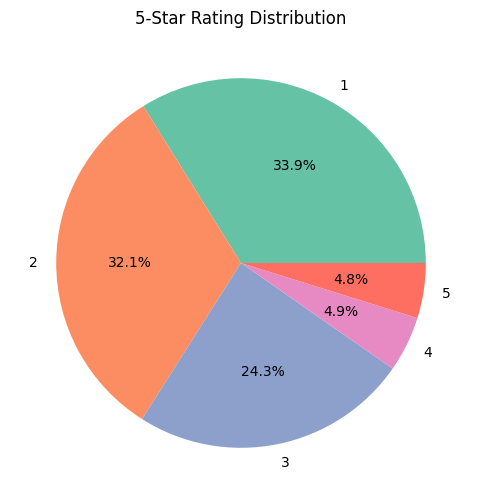

C:\Users\LCT\AppData\Local\Temp\ipykernel_15296\1339161761.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')


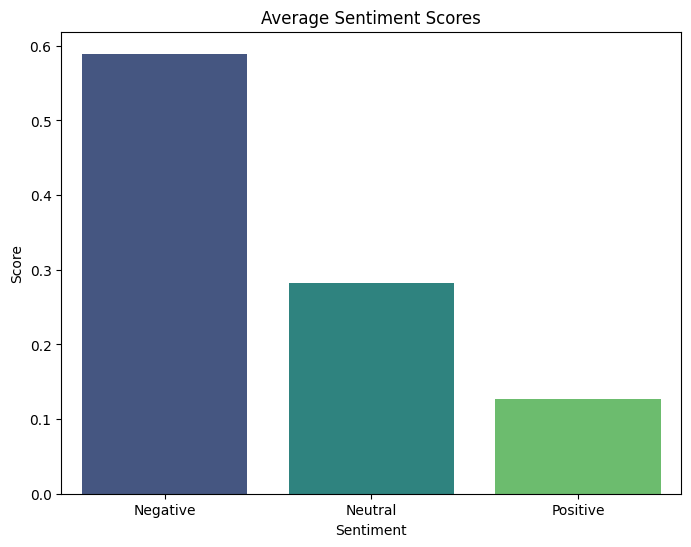

C:\Users\LCT\AppData\Local\Temp\ipykernel_15296\1339161761.py:54: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_year'] = df['commentTimestamp'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

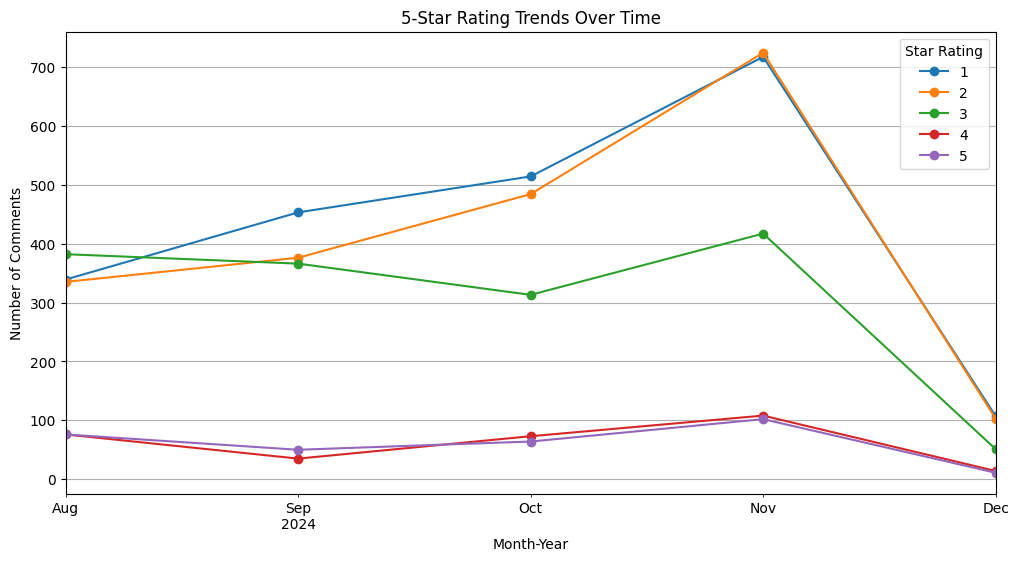

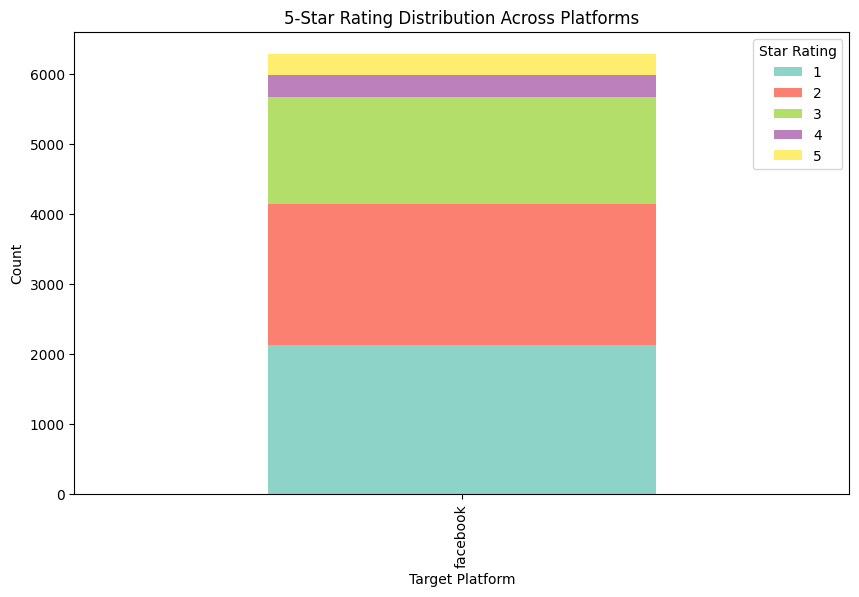

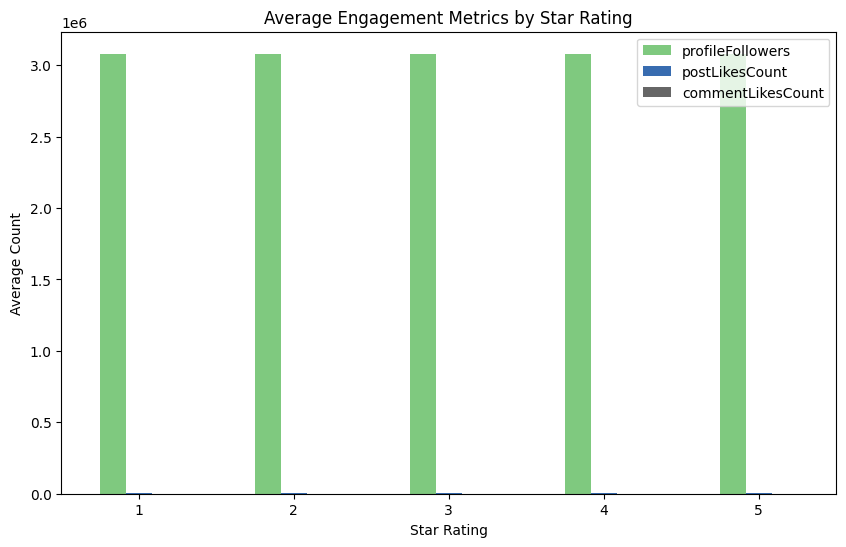

5-Star Rating Counts:
 starRating
1    2130
2    2022
3    1529
4     306
5     303
Name: count, dtype: int64

Average Sentiment Scores:
 {'Negative': np.float64(0.5894543195900505), 'Neutral': np.float64(0.28225387021401727), 'Positive': np.float64(0.126860968434046)}

Engagement Metrics by Star Rating:
             profileFollowers  postLikesCount  commentLikesCount
starRating                                                     
1                  3079672.0     3139.061033           0.257746
2                  3079672.0     3282.861523           0.277448
3                  3079672.0     4909.710922           0.199477
4                  3079672.0     8182.748366           0.215686
5                  3079672.0     8005.551155           0.171617


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the DataFrame is already loaded as `df`
# df = pd.read_csv('your_data.csv')  # Uncomment to load from a file

# Convert timestamps to datetime for analysis
df['commentTimestamp'] = pd.to_datetime(df['commentTimestamp'])
df['postTimestamp'] = pd.to_datetime(df['postTimestamp'])

# Function to map sentiment score to 5-star rating
def sentiment_to_stars(row):
    # Logic to assign stars based on sentiment scores
    if row['sentiment/negativeScore'] > max(row['sentiment/neutralScore'], row['sentiment/positiveScore']):
        return np.random.randint(1, 3)  # Negative: 1-2 stars
    elif row['sentiment/neutralScore'] >= row['sentiment/positiveScore'] and row['sentiment/neutralScore'] > row['sentiment/negativeScore']:
        return 3  # Neutral: 3 stars
    else:
        return np.random.randint(4, 6)  # Positive: 4-5 stars

# Apply the sentiment to stars conversion
df['starRating'] = df.apply(sentiment_to_stars, axis=1)

# ----- Sentiment Classification Distribution (5-Star) -----
star_counts = df['starRating'].value_counts()

# Pie Chart for 5-Star Sentiment Distribution
plt.figure(figsize=(8, 6))
star_counts.plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#ff6f61'])
plt.title('5-Star Rating Distribution')
plt.ylabel('')
plt.show()

# ----- Average Sentiment Scores -----
average_scores = {
    'Negative': df['sentiment/negativeScore'].mean(),
    'Neutral': df['sentiment/neutralScore'].mean(),
    'Positive': df['sentiment/positiveScore'].mean()
}
average_scores_df = pd.DataFrame(list(average_scores.items()), columns=['Sentiment', 'Average Score'])

# Bar Chart for Average Sentiment Scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Average Score', data=average_scores_df, palette='viridis')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.xlabel('Sentiment')
plt.show()

# ----- Time-Based Sentiment Trends (5-Star) -----
# Extract month-year for grouping
df['month_year'] = df['commentTimestamp'].dt.to_period('M')
star_trends = df.groupby(['month_year', 'starRating']).size().unstack()

# Line Chart for 5-Star Sentiment Trends Over Time
plt.figure(figsize=(10, 6))
star_trends.plot(marker='o', figsize=(12, 6))
plt.title('5-Star Rating Trends Over Time')
plt.ylabel('Number of Comments')
plt.xlabel('Month-Year')
plt.legend(title='Star Rating')
plt.grid()
plt.show()

# ----- Platform-Based 5-Star Sentiment Distribution -----
platform_star_rating = df.groupby(['targetPlatform', 'starRating']).size().unstack()

# Stacked Bar Chart for 5-Star Sentiment by Platform
platform_star_rating.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('5-Star Rating Distribution Across Platforms')
plt.ylabel('Count')
plt.xlabel('Target Platform')
plt.legend(title='Star Rating')
plt.show()

# ----- Profile Engagement by Sentiment -----
engagement_by_star = df.groupby('starRating')[['profileFollowers', 'postLikesCount', 'commentLikesCount']].mean()

# Bar Chart for Profile Engagement by Star Rating
engagement_by_star.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title('Average Engagement Metrics by Star Rating')
plt.ylabel('Average Count')
plt.xlabel('Star Rating')
plt.xticks(rotation=0)
plt.show()

# ----- Summary Statistics -----
print("5-Star Rating Counts:\n", star_counts)
print("\nAverage Sentiment Scores:\n", average_scores)
print("\nEngagement Metrics by Star Rating:\n", engagement_by_star)


In [3]:
import pandas as pd

# Ensure 'sentiment/positiveScore' is numeric
df['sentiment/positiveScore'] = pd.to_numeric(df['sentiment/positiveScore'], errors='coerce')

# Group by 'postUrl' and calculate the total positive score for each post
positive_scores_by_post = df.groupby('postUrl')['sentiment/positiveScore'].sum()

# Sort the posts by total positive score in descending order and get the top 3
top_3_positive_posts = positive_scores_by_post.sort_values(ascending=False).head(3)

# Prepare table structure for result
result_table = []

for post_url, positive_score in top_3_positive_posts.items():
    # Filter rows for the current post
    post_comments = df[df['postUrl'] == post_url]
    
    # Get post description
    post_description = post_comments['postDescription'].iloc[0]
    
    # Get the top 3 positive comments (highest positive sentiment)
    top_positive_comments = post_comments.sort_values(by='sentiment/positiveScore', ascending=False).head(3)
    
    # Add rows to result_table
    for _, row in top_positive_comments.iterrows():
        result_table.append({
            'postUrl': post_url,
            'postDescription': post_description,
            'sentiment/positiveScore': row['sentiment/positiveScore'],
            'commentText': row['commentText']
        })

# Convert result_table to DataFrame
result_df = pd.DataFrame(result_table)

# Display the final table
print(result_df)


                                             postUrl  \
0  https://www.facebook.com/airtelng/posts/pfbid0...   
1  https://www.facebook.com/airtelng/posts/pfbid0...   
2  https://www.facebook.com/airtelng/posts/pfbid0...   
3  https://www.facebook.com/airtelng/posts/pfbid0...   
4  https://www.facebook.com/airtelng/posts/pfbid0...   
5  https://www.facebook.com/airtelng/posts/pfbid0...   
6     https://www.facebook.com/reel/850787246924681/   
7     https://www.facebook.com/reel/850787246924681/   
8     https://www.facebook.com/reel/850787246924681/   

                                     postDescription  sentiment/positiveScore  \
0  Unlimited possibilities with unlimited data! \...                 0.990561   
1  Unlimited possibilities with unlimited data! \...                 0.986827   
2  Unlimited possibilities with unlimited data! \...                 0.984960   
3  Can you arrange the words correctly? \n\nRepos...                 0.980848   
4  Can you arrange the words corre

In [4]:
import pandas as pd

# Ensure 'sentiment/negativeScore' is numeric
df['sentiment/negativeScore'] = pd.to_numeric(df['sentiment/negativeScore'], errors='coerce')

# Group by 'postUrl' and calculate the total negative score for each post
negative_scores_by_post = df.groupby('postUrl')['sentiment/negativeScore'].sum()

# Sort the posts by total negative score in descending order and get the top 3
top_3_negative_posts = negative_scores_by_post.sort_values(ascending=False).head(3)

# Prepare table structure
result_table = []

for post_url, negative_score in top_3_negative_posts.items():
    # Filter rows for the current post
    post_comments = df[df['postUrl'] == post_url]
    
    # Get post description
    post_description = post_comments['postDescription'].iloc[0]
    
    # Get the top 3 negative comments
    top_negative_comments = post_comments.sort_values(by='sentiment/negativeScore', ascending=False).head(3)
    
    # Add rows to result_table
    for _, row in top_negative_comments.iterrows():
        result_table.append({
            'postUrl': post_url,
            'postDescription': post_description,
            'sentiment/negativeScore': row['sentiment/negativeScore'],
            'commentText': row['commentText']
        })

# Convert result_table to DataFrame
result_df = pd.DataFrame(result_table)

# Display the final table
print(result_df)


                                             postUrl  \
0  https://www.facebook.com/airtelng/posts/pfbid0...   
1  https://www.facebook.com/airtelng/posts/pfbid0...   
2  https://www.facebook.com/airtelng/posts/pfbid0...   
3  https://www.facebook.com/airtelng/posts/pfbid0...   
4  https://www.facebook.com/airtelng/posts/pfbid0...   
5  https://www.facebook.com/airtelng/posts/pfbid0...   
6  https://www.facebook.com/airtelng/posts/pfbid0...   
7  https://www.facebook.com/airtelng/posts/pfbid0...   
8  https://www.facebook.com/airtelng/posts/pfbid0...   

                                     postDescription  sentiment/negativeScore  \
0  With our social media bundles, the fun never s...                 0.961886   
1  With our social media bundles, the fun never s...                 0.960046   
2  With our social media bundles, the fun never s...                 0.958563   
3  Can you arrange the words correctly? \n\nRepos...                 0.967568   
4  Can you arrange the words corre